In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
df.dropna(inplace = True, subset = ["ArrDelay", "DepDelay", "Distance", "AirTime"])

# Ajustamos el tamaño del gráfico
sns.set(rc = {'figure.figsize': (15,10)})

C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


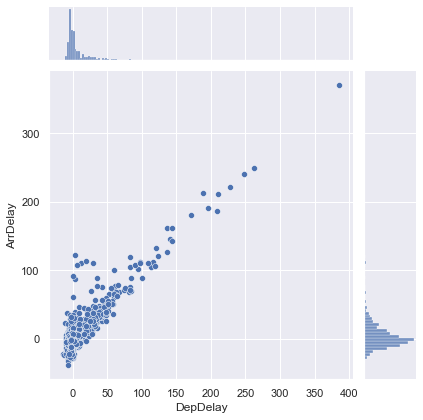

In [2]:
# Creo un subset con el conjunto de datos que voy a utilizar, escogemos de forma desordenada 1000 vuelos con punto de partida
# los aeropuertos de ATL, HOU, IND

df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])].sample(frac = 1).head(1000)

# Usamos la instrucción jointplot para mostrar una nube de puntos.

sns.jointplot(df2["DepDelay"], df2["ArrDelay"])



C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


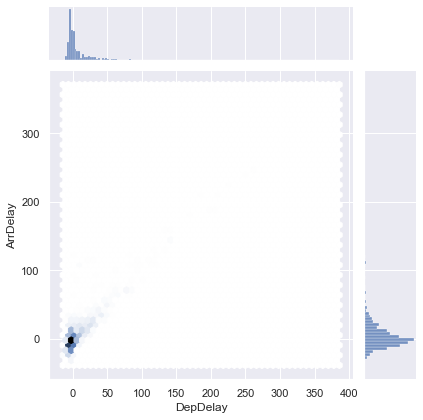

In [3]:
# La visualización que tenemos no despeja muchas dudas... Así que vamos a profundizar un poco más.

# Creamos un nuevo subconjunto de datos. Cogeremos los vuelos que se han retrasado en la llegado o en la salida menos de 40 min.
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

sns.jointplot(df2["DepDelay"], df2["ArrDelay"], kind = "hex")

# kind { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional

C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


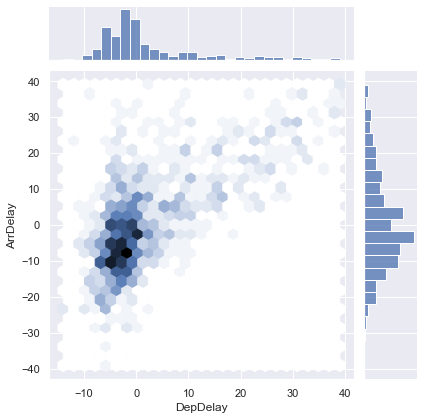

In [4]:
sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind = "hex")

C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


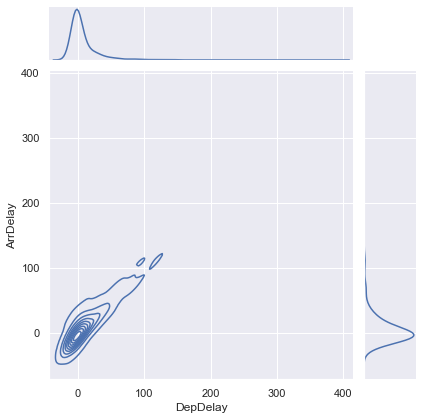

In [5]:
# Utilizamos df2
sns.jointplot(df2["DepDelay"], df2["ArrDelay"], kind = "kde")

C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


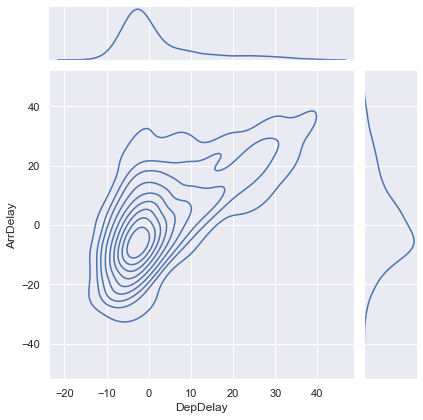

In [6]:
# Plot de densidad y curvas de nivel con df3

sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind = "kde")

In [7]:
# Vemos ahora las curvas de calor, sobre el df2, no queremos que sean indexadas, y vamos a ver el retraso medio de llegada.

gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index=False)["DepDelay"].mean())

# Solo se muestran los cinco primeros registros.
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,17.612903
1,ATL,2,9.378788
2,ATL,3,8.425532
3,ATL,4,4.295082
4,ATL,5,1.145161


In [8]:
# Para cada aeropuerto y cada mes tenemos una media.
data = gb_df.pivot ("Month", "Origin", "DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,17.612903,5.666667,7.833333
2,9.378788,27.000000,-0.222222
3,8.425532,26.400000,12.428571
4,4.295082,9.700000,-3.200000
5,1.145161,18.076923,0.142857
6,10.280488,16.666667,7.000000
7,23.123288,27.555556,0.636364
8,8.050000,-1.875000,-5.500000
9,2.140625,-0.800000,20.333333


<AxesSubplot:xlabel='Origin', ylabel='Month'>

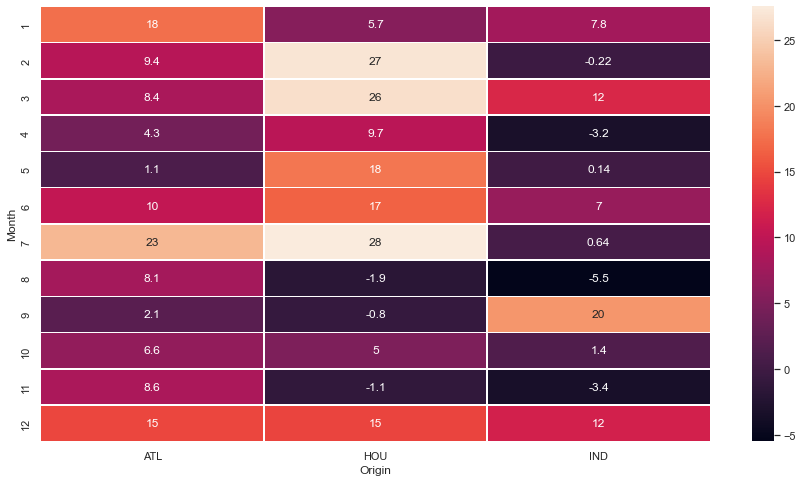

In [9]:
# Ahora convertimos la tabla en un gráfico.
sns.set(rc={'figure.figsize': (15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5)

# Vemos los retrasos que tenemos por aeropuerto y mes.